In [1]:
import pandas as pd

from sklearn.cluster import KMeans


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score


In [7]:
cocktail_df =pd.read_csv('cocktail_processed.csv')

In [8]:
cocktail_df

,ingredient_count,category_Ordinary Drink,category_Punch / Party Drink,glass_Cocktail glass,glass_Collins glass,glass_Highball glass,glass_Old-fashioned glass,glass_Other,glass_Whiskey sour glass,IBA,...,herbal_count,Whiskey,Vodka,Gin,Rum,Brandy,Spirit,alcoholic_ingredient_count,total_volume_ml,strength_percentage
0,5,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,249.86,12.01
1,4,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,51.76,34.78
2,6,1,0,0,0,1,0,0,0,0,...,0,0,1,1,1,0,1,4,109.16,21.69
3,3,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,3,88.71,25.99
4,4,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,74.10,31.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,99.22,19.66
130,3,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,88.72,36.33
131,3,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,148.71,5.57
132,3,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,66.54,30.66


In [9]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cocktail_df)

# Przekształcenie do DataFrame
df_scaled = pd.DataFrame(data_scaled, columns=cocktail_df.columns)
print(df_scaled)

     ingredient_count  category_Ordinary Drink  category_Punch / Party Drink  \
0            0.819279                -4.259443                     -0.086711   
1            0.029470                -4.259443                     -0.086711   
2            1.609087                 0.234772                     -0.086711   
3           -0.760338                 0.234772                     -0.086711   
4            0.029470                 0.234772                     -0.086711   
..                ...                      ...                           ...   
129         -0.760338                 0.234772                     -0.086711   
130         -0.760338                 0.234772                     -0.086711   
131         -0.760338                 0.234772                     -0.086711   
132         -0.760338                 0.234772                     -0.086711   
133          0.029470                 0.234772                     -0.086711   

     glass_Cocktail glass  glass_Collin

In [15]:
df_scaled

,ingredient_count,category_Ordinary Drink,category_Punch / Party Drink,glass_Cocktail glass,glass_Collins glass,glass_Highball glass,glass_Old-fashioned glass,glass_Other,glass_Whiskey sour glass,IBA,...,herbal_count,Whiskey,Vodka,Gin,Rum,Brandy,Spirit,alcoholic_ingredient_count,total_volume_ml,strength_percentage
0,0.819279,-4.259443,-0.086711,-0.886942,-0.283981,2.623424,-0.478913,-0.216506,-0.29905,2.196836,...,2.820061,-0.502331,-0.341565,-0.711068,2.088061,-0.283981,-0.381181,-1.137014,2.486648,-1.115449
1,0.029470,-4.259443,-0.086711,-0.886942,-0.283981,-0.381181,2.088061,-0.216506,-0.29905,2.196836,...,-0.302982,1.990719,-0.341565,-0.711068,-0.478913,-0.283981,-0.381181,-1.137014,-1.065712,1.495008
2,1.609087,0.234772,-0.086711,-0.886942,-0.283981,2.623424,-0.478913,-0.216506,-0.29905,-0.455200,...,-0.302982,-0.502331,2.927700,1.406335,2.088061,-0.283981,2.623424,2.907939,-0.036406,-0.005689
3,-0.760338,0.234772,-0.086711,-0.886942,-0.283981,-0.381181,2.088061,-0.216506,-0.29905,2.196836,...,-0.302982,-0.502331,-0.341565,1.406335,-0.478913,-0.283981,-0.381181,1.559621,-0.403119,0.487282
4,0.029470,0.234772,-0.086711,-0.886942,-0.283981,-0.381181,2.088061,-0.216506,-0.29905,2.196836,...,-0.302982,1.990719,-0.341565,-0.711068,-0.478913,-0.283981,-0.381181,-1.137014,-0.665108,1.168271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,-0.760338,0.234772,-0.086711,1.127469,-0.283981,-0.381181,-0.478913,-0.216506,-0.29905,-0.455200,...,-0.302982,-0.502331,-0.341565,-0.711068,2.088061,-0.283981,-0.381181,0.211304,-0.214652,-0.238418
130,-0.760338,0.234772,-0.086711,1.127469,-0.283981,-0.381181,-0.478913,-0.216506,-0.29905,-0.455200,...,-0.302982,-0.502331,2.927700,-0.711068,-0.478913,3.521363,-0.381181,1.559621,-0.402940,1.672707
131,-0.760338,0.234772,-0.086711,-0.886942,3.521363,-0.381181,-0.478913,-0.216506,-0.29905,-0.455200,...,-0.302982,-0.502331,-0.341565,-0.711068,-0.478913,-0.283981,-0.381181,-1.137014,0.672810,-1.853760
132,-0.760338,0.234772,-0.086711,1.127469,-0.283981,-0.381181,-0.478913,-0.216506,-0.29905,-0.455200,...,-0.302982,-0.502331,-0.341565,1.406335,-0.478913,-0.283981,-0.381181,0.211304,-0.800675,1.022672


In [16]:
from sklearn.cluster import KMeans

C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

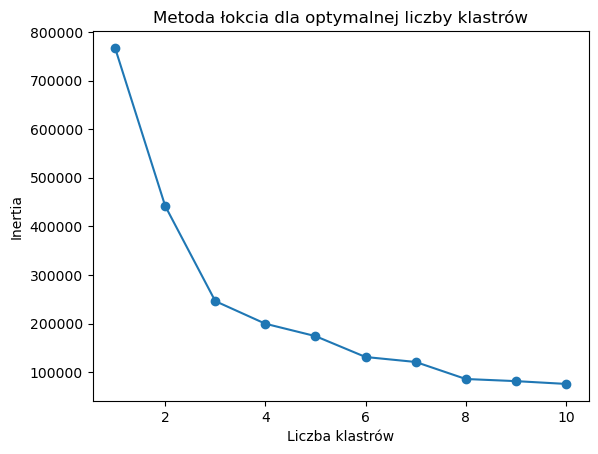

In [20]:
import matplotlib.pyplot as plt



inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cocktail_df)  
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inertia')
plt.title('Metoda łokcia dla optymalnej liczby klastrów')
plt.show()


C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

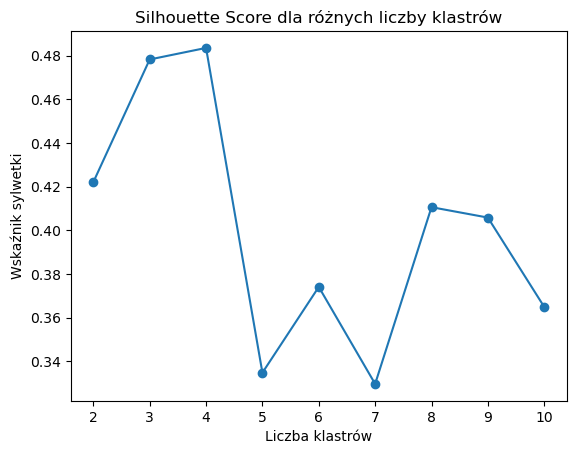

In [24]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cocktail_df)
    score = silhouette_score(cocktail_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Wskaźnik sylwetki')
plt.title('Silhouette Score dla różnych liczby klastrów')
plt.show()


In [29]:
kmeans = KMeans(n_clusters=8)

In [30]:
kmeans.fit(cocktail_df)

C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

In [31]:
kmeans.cluster_centers_

array([[ 5.12500000e+00,  8.75000000e-01,  0.00000000e+00,
         1.25000000e-01,  2.50000000e-01,  2.50000000e-01,
         3.75000000e-01, -6.93889390e-18,  0.00000000e+00,
         2.50000000e-01,  1.25000000e-01,  1.25000000e-01,
         2.37500000e+02,  2.50000000e-01,  5.00000000e-01,
         1.25000000e-01,  3.75000000e-01,  5.00000000e-01,
         1.00000000e+00,  7.50000000e-01,  5.00000000e-01,
         1.25000000e-01,  0.00000000e+00,  2.50000000e-01,
         1.38777878e-17,  5.00000000e-01,  1.25000000e-01,
         1.25000000e-01,  3.75000000e-01,  2.00000000e+00,
         1.13718750e+02,  2.18562500e+01],
       [ 2.52631579e+00,  1.00000000e+00,  3.46944695e-18,
         6.31578947e-01,  0.00000000e+00,  0.00000000e+00,
         2.10526316e-01,  1.05263158e-01,  2.77555756e-17,
         2.10526316e-01,  5.26315789e-02,  1.57894737e-01,
         7.71578947e+01,  3.68421053e-01,  4.21052632e-01,
         6.31578947e-01,  0.00000000e+00,  5.26315789e-02,
         6.31

C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


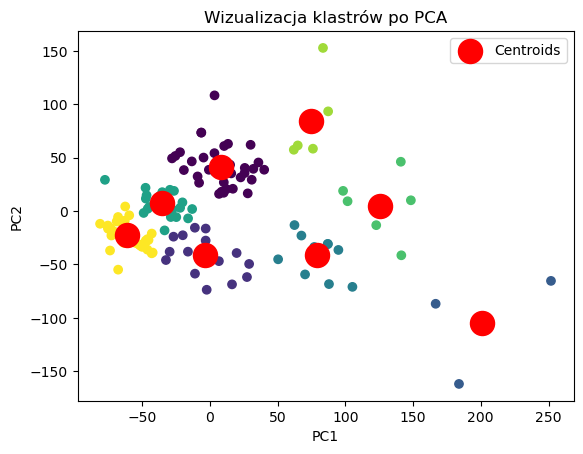

In [32]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cocktail_df)


kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(reduced_data)
labels = kmeans.labels_


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wizualizacja klastrów po PCA')
plt.legend()
plt.show()


C:\Users\kjani\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


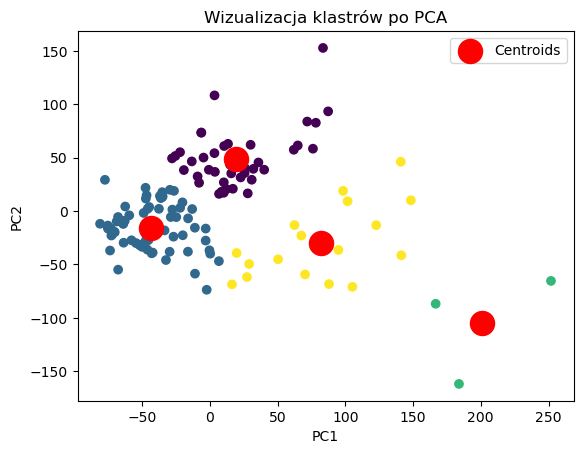

In [33]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cocktail_df)


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(reduced_data)
labels = kmeans.labels_


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wizualizacja klastrów po PCA')
plt.legend()
plt.show()